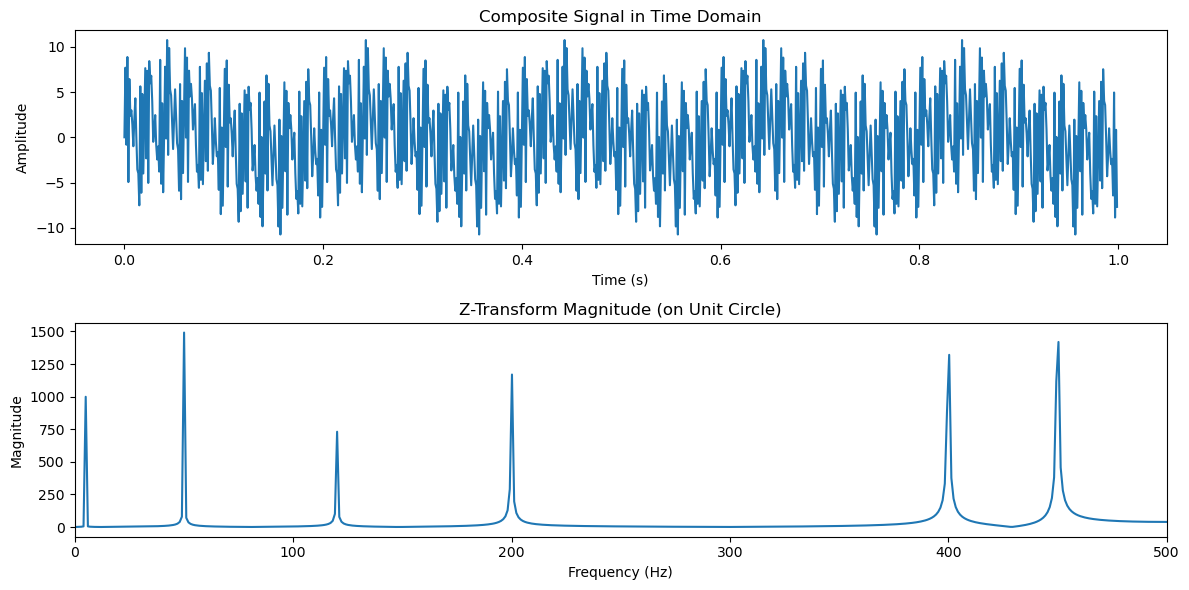

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define sampling parameters
sampling_rate = 1000  # Hz
duration = 1  # seconds
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# Define multiple frequencies and corresponding amplitudes
frequencies = [5, 50, 120, 200, 400, 450]  # Frequencies of sine waves (Hz)
amplitudes = [2.0, 3.0, 1.5, 2.5, 3.5, 4.0]  # Corresponding amplitudes

# Generate the composite signal by summing sine waves with the given frequencies and amplitudes
signal = sum(amplitude * np.sin(2 * np.pi * frequency * t) for amplitude, frequency in zip(amplitudes, frequencies))

# Define Z-transform calculation on the unit circle (i.e., z = e^(j*omega))
N = len(signal)
omega = np.linspace(0, 2 * np.pi, N)  # Omega values from 0 to 2*pi (unit circle)

# Calculate the Z-transform (magnitude) on the unit circle
z_transform_magnitude = []
for w in omega:
    z = np.exp(1j * w)  # z = e^(j*omega)
    z_transform = sum(signal[n] * (z ** -n) for n in range(N))
    z_transform_magnitude.append(abs(z_transform))

# Plot the original composite signal in time domain
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, signal)
plt.title("Composite Signal in Time Domain")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

# Plot the magnitude of the Z-transform on the unit circle
plt.subplot(2, 1, 2)
plt.plot(omega * sampling_rate / (2 * np.pi), z_transform_magnitude)  # Convert omega to frequency in Hz
plt.title("Z-Transform Magnitude (on Unit Circle)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.xlim(0, 500)  # Limit the x-axis up to half the sampling rate for clarity

plt.tight_layout()
plt.show()